In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
mnist=tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [7]:
test_labels.shape

(10000,)

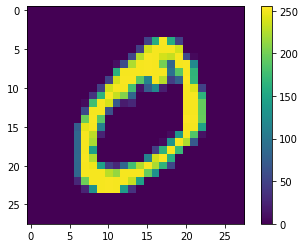

In [12]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
#plt.grid()
plt.show()


In [13]:
train_images=train_images/255.0
test_images=test_images/255.0

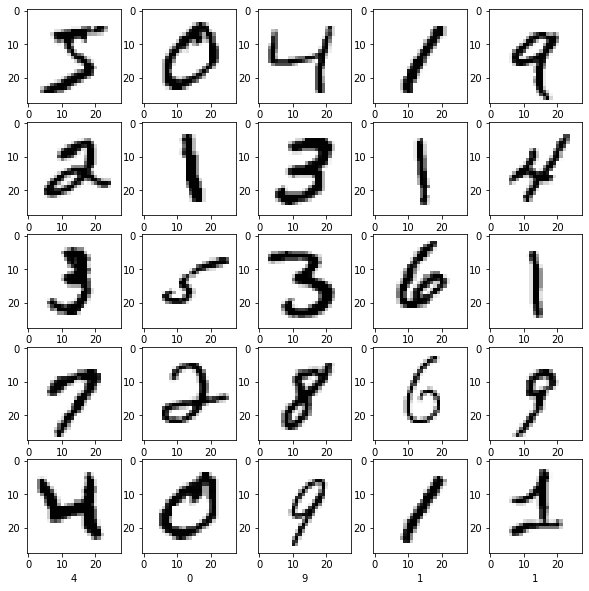

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])

#plt.grid()
plt.show()

In [20]:
from tensorflow.keras.layers import Dense,Flatten

In [21]:
model=tf.keras.Sequential()

In [25]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10))

In [29]:
model.compile(optimizer='sgd',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),metrics=['accuracy'])

In [31]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6251 - accuracy: 0.8356
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2988 - accuracy: 0.9148
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2498 - accuracy: 0.9280
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2157 - accuracy: 0.9387
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1893 - accuracy: 0.9455
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1686 - accuracy: 0.9513
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1521 - accuracy: 0.9564
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1381 - accuracy: 0.9609
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1264 - accuracy: 0.9641
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.116

In [32]:
test_loss,test_accuracy=model.evaluate(test_images,test_labels,verbose=2)
print("accuracy=",test_accuracy)

313/313 - 0s - loss: 0.1189 - accuracy: 0.9639
accuracy= 0.9639000296592712


In [33]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [36]:
prediction=probability_model.predict(test_images)

In [39]:
prediction[1]

array([2.5619147e-04, 1.1621647e-03, 9.4435984e-01, 3.5074797e-02,
       1.8044419e-07, 1.4803545e-02, 1.4480189e-03, 1.1929123e-09,
       2.8951750e-03, 1.1339904e-08], dtype=float32)

In [40]:
np.argmax(prediction[1])

2

In [42]:
test_labels[1]

2